## setup

In [84]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from PIL import Image

# show all dataframe
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_columns', None)  

## import

In [2]:
df_raw = pd.read_csv('tran_file\df_full_selection.csv')
df_raw.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,"1996.61.3a, b",False,False,False,78944,NaN,Costume Institute,1996.0,Suit,Suit,American,NaN,NaN,NaN,NaN,211692014,Design House|Designer,|,Perry Ellis Sportswear Inc.|Perry Ellis,"American, founded 1978|American, 1940–1986",|,Ellis Perry Sportswear Inc.|Ellis Perry,|American,1978 |1940,9999 |1986,|,|,|,ca. 1980,1975,1985,cotton,NaN,"Gift of Roz Gerten Jacobs, 1996",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/78944,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,"1996.61.4a, b",False,False,False,78945,NaN,Costume Institute,1996.0,Suit,Suit,American,NaN,NaN,NaN,NaN,211692014,Design House|Designer,|,Perry Ellis Sportswear Inc.|Perry Ellis,"American, founded 1978|American, 1940–1986",|,Ellis Perry Sportswear Inc.|Ellis Perry,|American,1978 |1940,9999 |1986,|,|,|,fall/winter 1981–82,1981,1982,wool,NaN,"Gift of Roz Gerten Jacobs, 1996",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/78945,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,1996.61.5a–c,False,False,False,78946,NaN,Costume Institute,1996.0,Suit,Suit,American,NaN,NaN,NaN,NaN,211692014,Design House|Designer,|,Perry Ellis Sportswear Inc.|Perry Ellis,"American, founded 1978|American, 1940–1986",|,Ellis Perry Sportswear Inc.|Ellis Perry,|American,1978 |1940,9999 |1986,|,|,|,fall/winter 1981–82,1981,1982,wool,NaN,"Gift of Roz Gerten Jacobs, 1996",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/78946,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,"1996.61.6a, b",False,False,False,78947,NaN,Costume Institute,1996.0,Suit,Suit,American,NaN,NaN,NaN,NaN,211692014,Design House|Designer,|,Perry Ellis Sportswear Inc.|Perry Ellis,"American, founded 1978|American, 1940–1986",|,Ellis Perry Sportswear Inc.|Ellis Perry,|American,1978 |1940,9999 |1986,|,|,|,1981,1981,1981,"linen, wool",NaN,"Gift of Roz Gerten Jacobs, 1996",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/78947,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,"1996.61.8a, b",False,False,False,78949,NaN,Costume Institute,1996.0,Suit,Suit,Italian,NaN,NaN,NaN,NaN,25847234812015,Design House|Department Store|Designer,| |,Giorgio Armani|I. Magnin & Co.|Giorgio Armani,"Italian, founded 1974|American, founded 1876|Italian, born 1934",| |,Armani|Magnin I. & Co.|Armani Giorgio,Italian|American|Italian,1974 |1876 |1934-07-11,9999 | |9999,||,(not assigned)||http://vocab.getty.edu/page/ulan/500016277,https://www.wikidata.org/wiki/Q157054||https://www.wikidata.org/wiki/Q157054,ca. 1982,1977,1987,wool,NaN,"Gift of Roz Gerten Jacobs, 1996",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/78949,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [3]:
col_sel = ['Object Number','Object ID', 'Is Public Domain', 'Department','Object Name', 
            'Title', 'Culture', 'Link Resource']

df = df_raw[col_sel]

## cleanup

In [4]:
# only take the ones in public domain
# because the first batch is public domain images only
df = df[df['Is Public Domain']==True]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3018 entries, 13 to 14289
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Object Number     3018 non-null   object
 1   Object ID         3018 non-null   int64 
 2   Is Public Domain  3018 non-null   bool  
 3   Department        3018 non-null   object
 4   Object Name       3018 non-null   object
 5   Title             2625 non-null   object
 6   Culture           2905 non-null   object
 7   Link Resource     3018 non-null   object
dtypes: bool(1), int64(1), object(6)
memory usage: 191.6+ KB


## process image: mirror

results are not ideal

### prototype

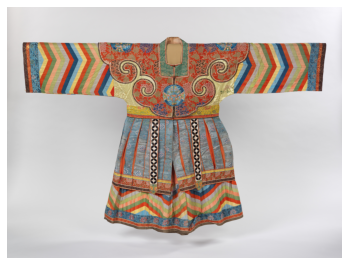

In [25]:
# view
raw_img = mpimg.imread("test/70787.jpg")
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(raw_img)
plt.show()

In [26]:
# check size
raw_img.shape

(3002, 4000, 3)

In [52]:
type(raw_img)

numpy.ndarray

In [56]:
raw_img[0][0]

array([217, 213, 214], dtype=uint8)

In [33]:
# load image
img1 = Image.open('test/70787.jpg')

In [34]:
# some parameters
w, h = img1.size
bg_side_len = (max(w,h), max(w,h)) # set the canvas size, with max width or length
dist = (h-w)/2 # distance from center

In [47]:
# initiate a black background
bg = Image.new('RGB', (bg_side_len), color = 'black')

# mirror along the longer side
if h > w:
    img2 = img1.transpose(Image.FLIP_LEFT_RIGHT) 

    bg.paste(img1, (int(dist),0))
    bg.paste(img2, (int(dist)+w,0))
    bg.paste(img2, (int(dist)-w,0))

if w > h:
    img2 = img1.transpose(Image.FLIP_TOP_BOTTOM) 

    bg.paste(img1, (0,-int(dist)))
    bg.paste(img2, (0,-int(dist)+h))
    bg.paste(img2, (0,-int(dist)-h))

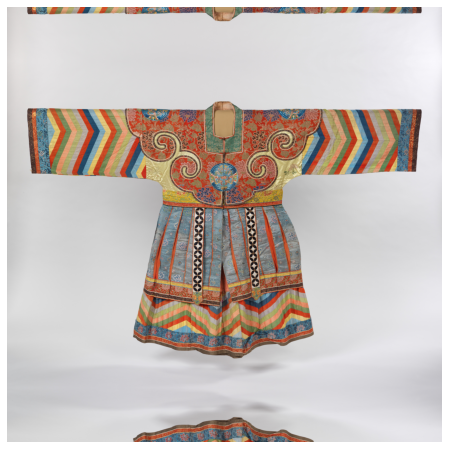

In [48]:
# checkout result
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(bg)
plt.show()

### def functions

In [58]:
def proc_img_square(filepath='test/74364.jpg'):
    # start timer
    start = time.time()

    # load image
    img1 = Image.open(filepath)

    # some parameters
    w, h = img1.size
    bg_side_len = (max(w,h), max(w,h)) # set the canvas size, with max width or length
    dist = (h-w)/2 # distance from center

    # initiate a black background
    bg = Image.new('RGB', (bg_side_len), color = 'black')

    # mirror along the longer side
    if h > w:
        img2 = img1.transpose(Image.FLIP_LEFT_RIGHT) 

        bg.paste(img1, (int(dist),0))
        bg.paste(img2, (int(dist)+w,0))
        bg.paste(img2, (int(dist)-w,0))

    if w > h:
        img2 = img1.transpose(Image.FLIP_TOP_BOTTOM) 

        bg.paste(img1, (0,-int(dist)))
        bg.paste(img2, (0,-int(dist)+h))
        bg.paste(img2, (0,-int(dist)-h))

    # checkout result
    plt.figure(figsize=(4,4))
    plt.axis('off')
    plt.imshow(bg)
    plt.show()

    # timer ends
    end = time.time()
    print(f'it took {end-start} seconds to process this image.')

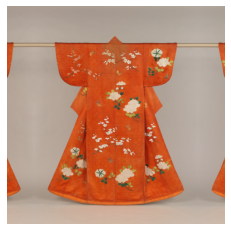

it took 0.3100697994232178 seconds to process this image.


In [59]:
proc_img_square()

### try it out

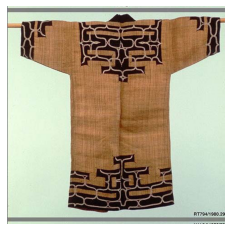

it took 0.051011085510253906 seconds to process this image.


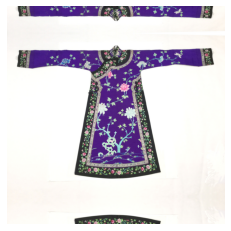

it took 0.6335067749023438 seconds to process this image.


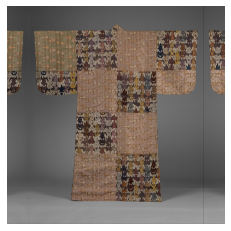

it took 0.7992322444915771 seconds to process this image.


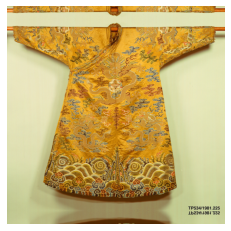

it took 0.33675622940063477 seconds to process this image.


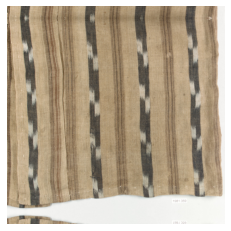

it took 0.2051377296447754 seconds to process this image.


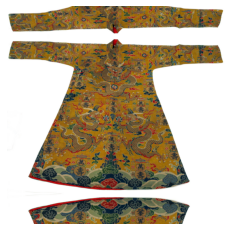

it took 0.5110228061676025 seconds to process this image.


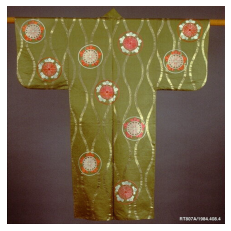

it took 0.05801558494567871 seconds to process this image.


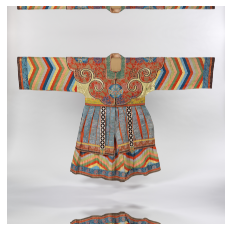

it took 0.8830294609069824 seconds to process this image.


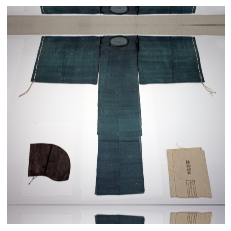

it took 0.8803966045379639 seconds to process this image.


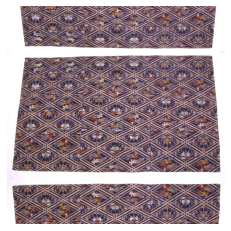

it took 0.4305133819580078 seconds to process this image.


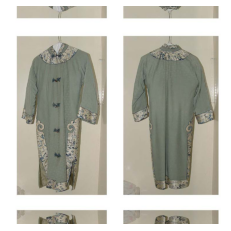

it took 0.0690155029296875 seconds to process this image.


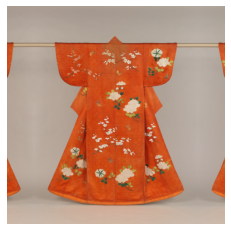

it took 0.30022263526916504 seconds to process this image.


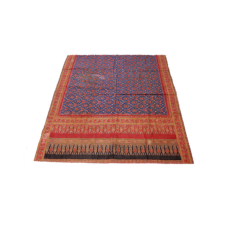

it took 0.26067447662353516 seconds to process this image.


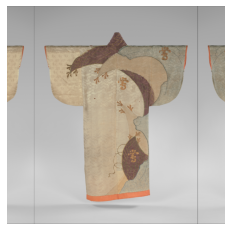

it took 0.3831620216369629 seconds to process this image.


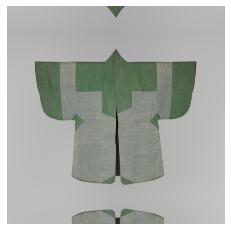

it took 0.866828441619873 seconds to process this image.


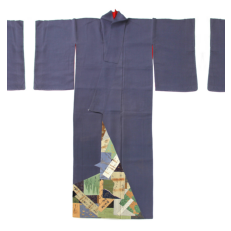

it took 0.2226409912109375 seconds to process this image.


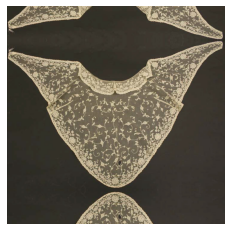

it took 0.0755622386932373 seconds to process this image.


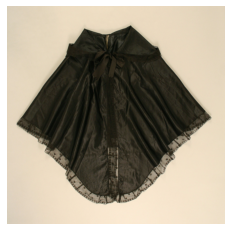

it took 0.35919880867004395 seconds to process this image.


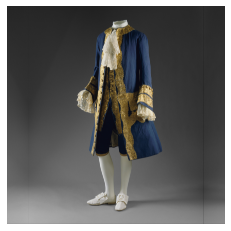

it took 0.7955961227416992 seconds to process this image.


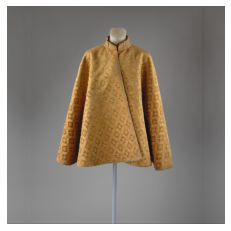

it took 0.2723405361175537 seconds to process this image.


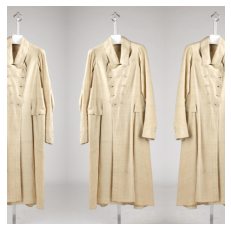

it took 0.4399688243865967 seconds to process this image.


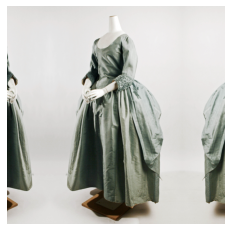

it took 0.516089677810669 seconds to process this image.


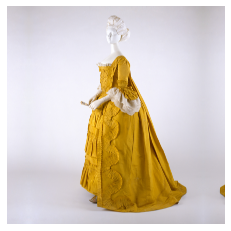

it took 0.8723900318145752 seconds to process this image.


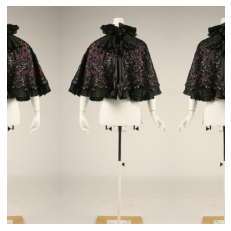

it took 0.4858431816101074 seconds to process this image.


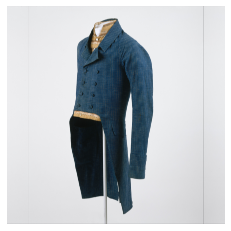

it took 0.8120510578155518 seconds to process this image.
11.58554983139038 seconds spent.


In [60]:
start = time.time()

folder_name = 'test'

for filename in os.scandir(folder_name):
    if filename.is_file():
        # print(filename.path)
        proc_img_square(filename.path)

# timer ends
end = time.time()
print(f'{end-start} seconds spent.')

## process image: stretch edge

### prototype

#### horizontal img

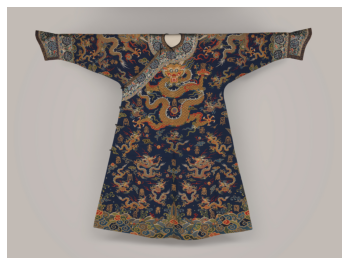

In [199]:
# view
raw_img = mpimg.imread("test/50487.jpg")
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(raw_img)
plt.show()

In [200]:
# create a blank place holder
# black ndarray
w = raw_img.shape[1]
h = raw_img.shape[0]
bg_side_len = max(w,h)
dist = (w-h)/2
first_row = raw_img[0]
last_row = raw_img[-1]

In [201]:
w,h

(4000, 3001)

In [219]:
proc_img = []
stripe1 = []
stripe2 = []

# create first stripe
for x in range(int(dist)):
    stripe1.append(first_row)

for x in range(int(dist)+1):
    stripe2.append(last_row)

proc_img = np.concatenate((stripe1,raw_img,stripe2))


In [221]:
len(stripe2)

500

In [222]:
len(raw_img)

3001

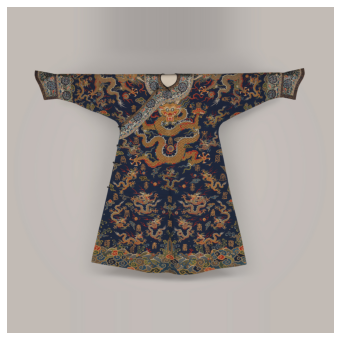

In [223]:
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(proc_img)
plt.show()

#### vertical img

In [127]:
is_ver = bool
offset = 5 # some images have a dark edge, use offset to get rid

# view, a vertical img
raw_img = mpimg.imread("test/79704.jpg")

w = raw_img.shape[1]
h = raw_img.shape[0]
bg_side_len = max(w,h)
dist = abs((w-h)/2)


if h > w:
    is_ver = True
    raw_img = np.rot90(raw_img, axes=(1,0))
if h < w:
    is_ver = False

first_row = raw_img[offset]
last_row = raw_img[-offset]

proc_img = []
stripe1 = []
stripe2 = []

# create first stripe
for x in range(int(dist)):
    stripe1.append(first_row)
    stripe2.append(last_row)


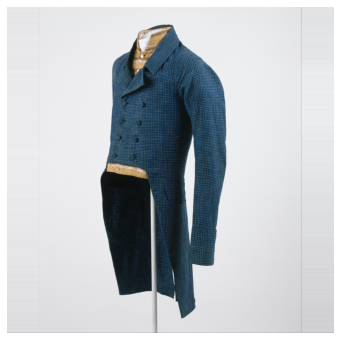

In [128]:

proc_img = np.concatenate((stripe1,raw_img,stripe2))

if is_ver == True:
    proc_img = np.rot90(proc_img)

plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(proc_img)
plt.show()


### define function

In [229]:
def proc_img_stretch(filepath="test/79704.jpg",offset=5):
    # start timer if needed
    # start = time.time()

    # read image
    raw_img = mpimg.imread(filepath)

    #some parameters
    is_ver = bool
    w = raw_img.shape[1]
    h = raw_img.shape[0]
    dist = abs((w-h)/2)

    if w == h:
        return raw_img

    # rotate vertical image
    # to process it as horizontal
    # and rotate it 
    if h > w:
        is_ver = True
        raw_img = np.rot90(raw_img, axes=(1,0))
    if h < w:
        is_ver = False


    # some images have a dark edge, use offset to get rid of it
    first_row = raw_img[offset]
    last_row = raw_img[-offset]

    proc_img = [] # placeholder
    stripe1 = [] # two stripes on the side
    stripe2 = []

    # generate stripes
    # will cause 1 pixel difference because of roundup
    for x in range(int(dist)):
        stripe1.append(first_row)
        stripe2.append(last_row)

    # concat
    if stripe1 != []:
        proc_img = np.concatenate((stripe1,raw_img))
    else:
        proc_img = raw_img

    if stripe2 != []:
        proc_img = np.concatenate((proc_img,stripe2))


    # rotate back vertical image
    if is_ver == True:
        proc_img = np.rot90(proc_img)

    # checkout result
    # plt.figure(figsize=(4,4))
    # plt.axis('off')
    # plt.imshow(proc_img)
    # plt.show()

    # timer ends
    # end = time.time()
    # print(f'it took {end-start} seconds to process this image.')

    return proc_img

### test run

In [230]:
start = time.time()

# create two folders for test
folder_name = 'test'
save_folder_name = 'test_proc'

for filename in os.scandir(folder_name):
    if filename.is_file():
        A = proc_img_stretch(filename.path)
        im = Image.fromarray(A)

        save_path = save_folder_name + '/' + filename.name
        im.save(save_path)
        
# timer ends
end = time.time()
print(f'{end-start} seconds spent.')

7.715891599655151 seconds spent.


### run on full folder

manully delete some unrelated images


use above time for estimation:
2555 images -- 15 min~


In [232]:
start = time.time()

# create two folders for test
folder_name = 'clean image/full_selection_sel'
save_folder_name = 'images_proc/full_selection_sel'

for filename in os.scandir(folder_name):
    if filename.is_file():
        A = proc_img_stretch(filename.path)
        im = Image.fromarray(A)

        save_path = save_folder_name + '/' + filename.name
        im.save(save_path)
        
# timer ends
end = time.time()
print(f'{end-start} seconds spent.')

789.2600705623627 seconds spent.
